<a href="https://colab.research.google.com/github/HuzainAzis/knn-cv/blob/master/sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


In [8]:
#load dataset
datatrain = pd.read_csv('/content/drive/My Drive/dataset/cardio/dataset5050train_1.csv')
datatest = pd.read_csv('/content/drive/My Drive/dataset/cardio/dataset5050test_1.csv')
#dataset.Type.value_count().plot(kind= "bar")
print (len(datatrain))
print (len(datatest))
datatrain

900
100


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
1,14,19834,1,164,68.0,110,60,1,1,0,0,0,0
2,15,22530,1,169,80.0,120,80,1,1,0,0,1,0
3,16,18815,2,173,60.0,120,80,1,1,0,0,1,0
4,18,14791,2,165,60.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1231,18296,1,170,59.0,120,80,1,1,0,0,1,1
896,1212,17476,2,174,75.0,140,90,3,1,0,0,1,1
897,1233,22415,1,169,68.0,120,80,1,1,0,0,1,1
898,1235,22571,1,164,66.0,120,80,1,1,0,0,0,1


In [0]:
#split target and attribute

x_train = datatrain.iloc[:, 1:12]
y_train = datatrain.iloc[:, 12]
x_test = datatest.iloc[:, 1:12]
y_test = datatest.iloc[:, 12]



Text(0.5, 1.0, 'testing')

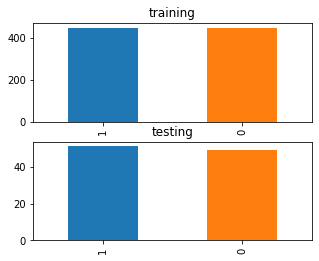

In [10]:
plt.figure(figsize=(5,4))
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [21]:
# scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)
x_train

array([[-0.72636939, -0.75543407, -0.75099244, ..., -0.31661412,
        -0.22124884,  0.52420181],
       [ 0.14018073, -0.75543407, -0.0233127 , ..., -0.31661412,
        -0.22124884, -1.90766225],
       [ 1.21876759, -0.75543407,  0.58308707, ..., -0.31661412,
        -0.22124884,  0.52420181],
       ...,
       [ 1.17275962, -0.75543407,  0.58308707, ..., -0.31661412,
        -0.22124884,  0.52420181],
       [ 1.23517043, -0.75543407, -0.0233127 , ..., -0.31661412,
        -0.22124884, -1.90766225],
       [-1.70613913,  1.32374226,  0.94692694, ..., -0.31661412,
        -0.22124884,  0.52420181]])

In [15]:
math.sqrt(900)

30.0

In [29]:
for x in range(2,100):   
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    print("k =", + x )
    print (cm)
    print("Akurasi :" , accuracy_score(y_test, y_pred))
    print("presisi :" , precision_score(y_test, y_pred ))
    print("recall :" , recall_score(y_test, y_pred))
    print("F-Score :" , f1_score(y_test, y_pred))
    print("--------------------------------------------")

k = 2
[[45  4]
 [29 22]]
Akurasi : 0.67
presisi : 0.8461538461538461
recall : 0.43137254901960786
F-Score : 0.5714285714285715
--------------------------------------------
k = 3
[[32 17]
 [20 31]]
Akurasi : 0.63
presisi : 0.6458333333333334
recall : 0.6078431372549019
F-Score : 0.6262626262626263
--------------------------------------------
k = 4
[[41  8]
 [26 25]]
Akurasi : 0.66
presisi : 0.7575757575757576
recall : 0.49019607843137253
F-Score : 0.5952380952380952
--------------------------------------------
k = 5
[[34 15]
 [18 33]]
Akurasi : 0.67
presisi : 0.6875
recall : 0.6470588235294118
F-Score : 0.6666666666666667
--------------------------------------------
k = 6
[[40  9]
 [22 29]]
Akurasi : 0.69
presisi : 0.7631578947368421
recall : 0.5686274509803921
F-Score : 0.651685393258427
--------------------------------------------
k = 7
[[38 11]
 [21 30]]
Akurasi : 0.68
presisi : 0.7317073170731707
recall : 0.5882352941176471
F-Score : 0.6521739130434783
------------------------------

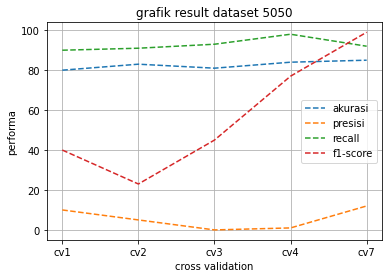

In [31]:
from matplotlib import pyplot as plot
x = ["cv1", "cv2", "cv3", "cv4", "cv7"]
a= [80,83,81,84,85]
p= [10,5,0,1,12]
r= [90,91,93,98,92]
f= [40,23,45,77,99]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset 5050")
plt.xlabel("cross validation")
plt.ylabel("performa")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()